In [453]:
# Sources
# https://matheusfacure.github.io/python-causality-handbook/15-Synthetic-Control.html
# https://nbviewer.jupyter.org/github/OscarEngelbrektson/SyntheticControlMethods/blob/master/examples/user_guide.ipynb

In [454]:
import warnings
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os 
from typing import List
from operator import add
from toolz import reduce, partial
from scipy import stats
from scipy.optimize import fmin_slsqp
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from matplotlib import style
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", 6)
style.use("fivethirtyeight")

# read data file
# pandas read_csv
dirs = os.getcwd() 
files = os.listdir(dirs) 

data = pd.read_excel(r'/Users/jinhyun/Documents/GitHub/Python/UvA projects/Thesis/MSc/data/processed raw data_2.xlsx') 
data = data.loc[ (data.year < 2021) & (data.year >= 1965)]
raw_data = copy.deepcopy(data)# Copy dataframe



## Descriptive statistics

# 1. Raw data

In [455]:

data_gdp = data
[['year','country','GDP (current US$)',
 'Foreign direct investment, net inflows (BoP, current US$)','GDP growth (annual %)','Life expectancy at birth, total (years)'
 ,'Agriculture, forestry, and fishing, value added (% of GDP)'
 ,'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 ,'Inflation, GDP deflator (annual %)'
 ,'School enrollment, primary (% gross)'
 ,'Fertility rate, total (births per woman)'
 , 'Surface area (sq. km)'
 ,'Mortality rate, under-5 (per 1,000 live births)']]

data_gdp_growth = data[
    ['year','country','GDP growth (annual %)','Industry (including construction), value added (% of GDP)',
    'Life expectancy at birth, total (years)','Inflation, GDP deflator (annual %)']]


data_inv = data[
    ['year','country','Gross capital formation (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Inflation, GDP deflator (annual %)',
       'Merchandise trade (% of GDP)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'School enrollment, primary (% gross)']]

data_export = data[
    ['year','country', 'Exports of goods and services (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Inflation, GDP deflator (annual %)',
       'Surface area (sq. km)',
       'Merchandise trade (% of GDP)',
       'Life expectancy at birth, total (years)',
       'School enrollment, primary (% gross)']]


data_import = data[
    ['year','country', 'Imports of goods and services (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Inflation, GDP deflator (annual %)',
       'Surface area (sq. km)',
       'Merchandise trade (% of GDP)',
       'Life expectancy at birth, total (years)',
       'School enrollment, primary (% gross)']]
       
data_fdi = data[
    ['year','country', 'Foreign direct investment, net inflows (BoP, current US$)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Merchandise trade (% of GDP)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Population density (people per sq. km of land area)',
        'Population, total',
       'School enrollment, primary (% gross)', 'Surface area (sq. km)',
       'Urban population growth (annual %)' ]]




In [456]:
from ascm.graph import graph_original
from ascm.graph import agumented_synthetic_control_dataframe


In [457]:
import imp
import ascm # get module reference for reload
imp.reload(ascm.graph)

from ascm.graph  import graph_original
from ascm.graph  import agumented_synthetic_control_dataframe
from ascm.graph  import ascm_visualize
from ascm.graph  import rmspe_table
from ascm.graph  import p_value
from ascm.graph  import placebo
from ascm.graph  import ascm_limit_donor_pool

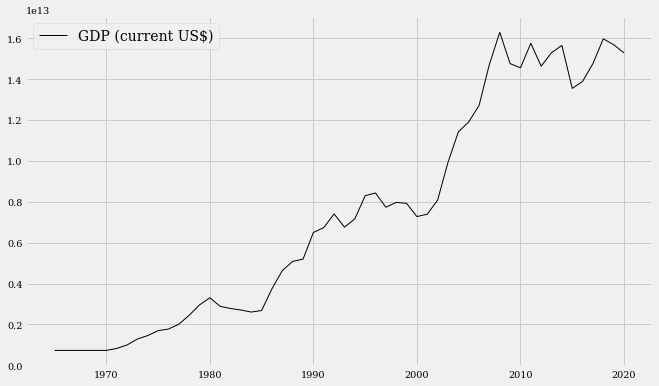

In [458]:
graph_original('European Union','GDP (current US$)', data_gdp)

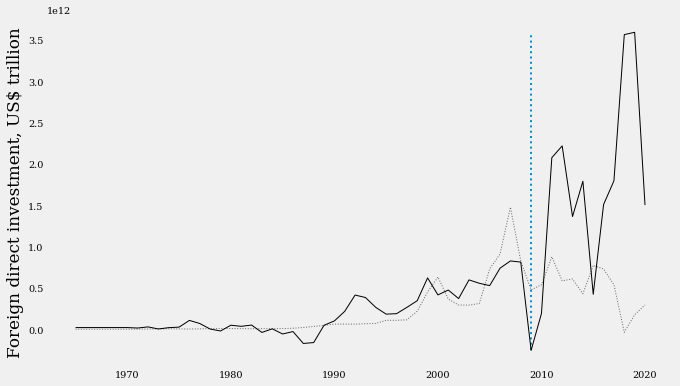

In [459]:
ascm_visualize('European Union','Foreign direct investment, net inflows (BoP, current US$)', data_fdi, incident= 'QE', incident_year=2009, std_scaling=False, ylabel="Foreign direct investment, US$ trillion")



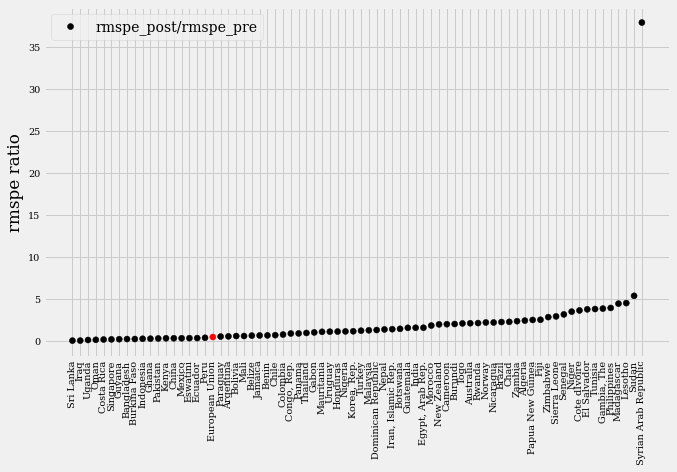

In [460]:
rmspe_table('European Union','GDP (current US$)', data_gdp, incident_year=2011, outlier = 1)

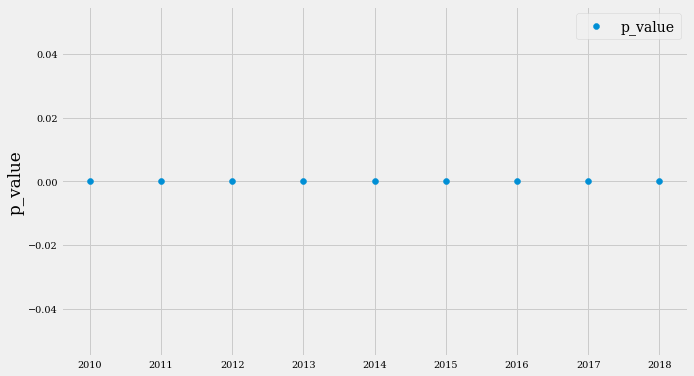

In [461]:
p_value('European Union','GDP (current US$)', data_gdp, incident_year = 2009, detail= False)

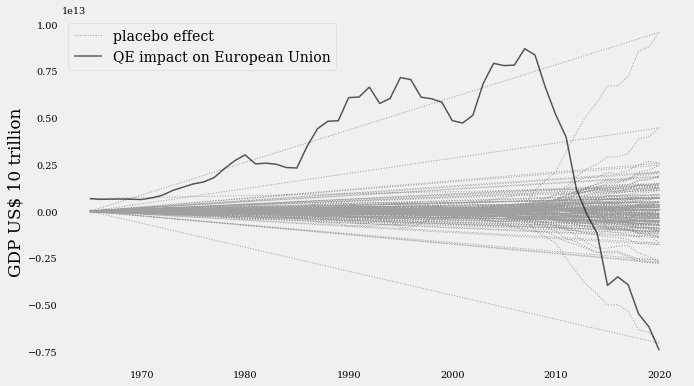

In [462]:
placebo('European Union','GDP (current US$)', data_gdp, incident_year = 2009, ylabel="GDP US$ 10 trillion" )

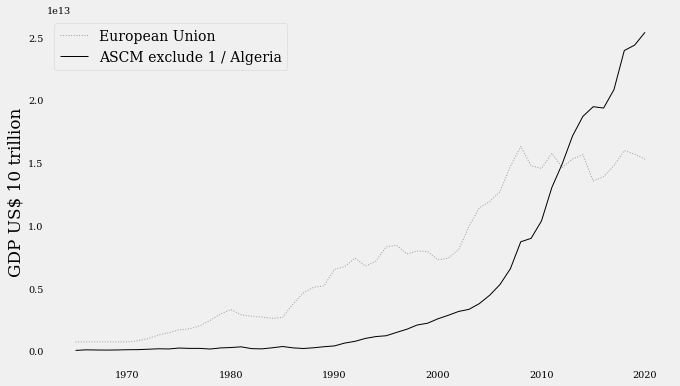

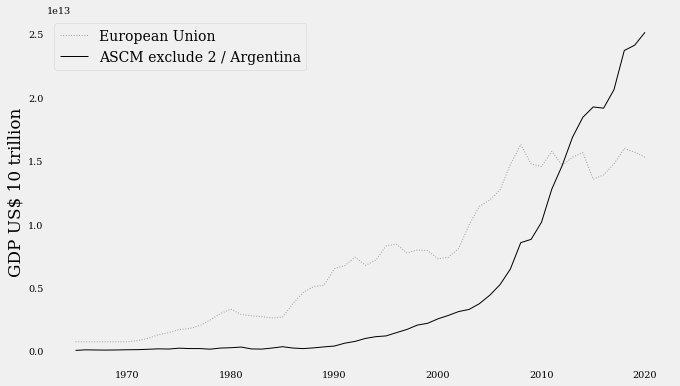

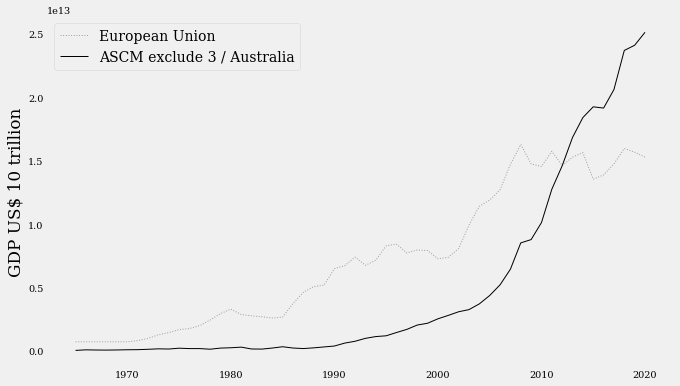

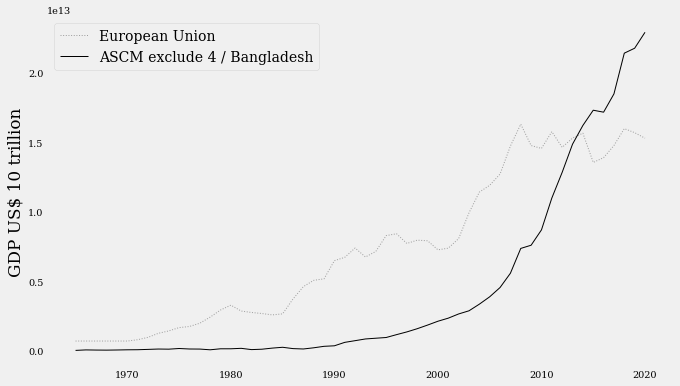

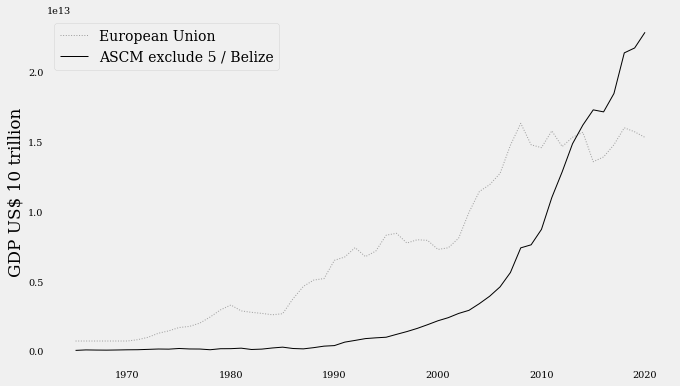

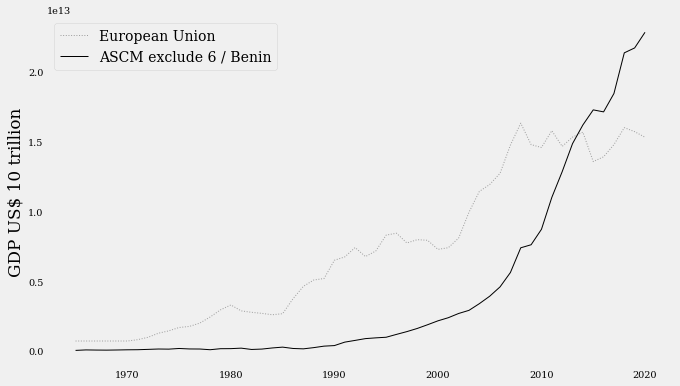

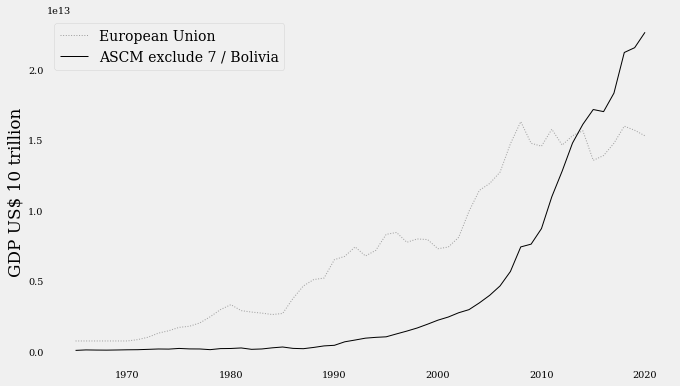

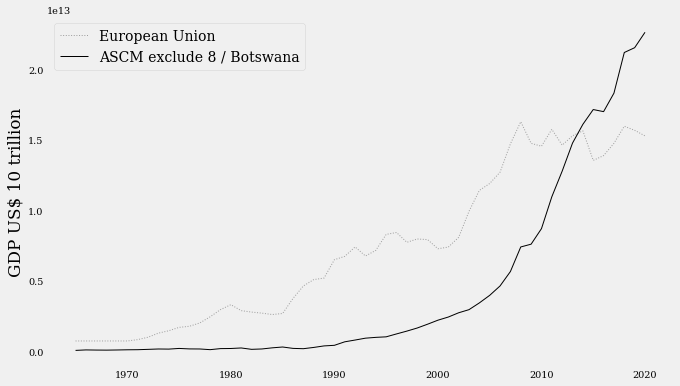

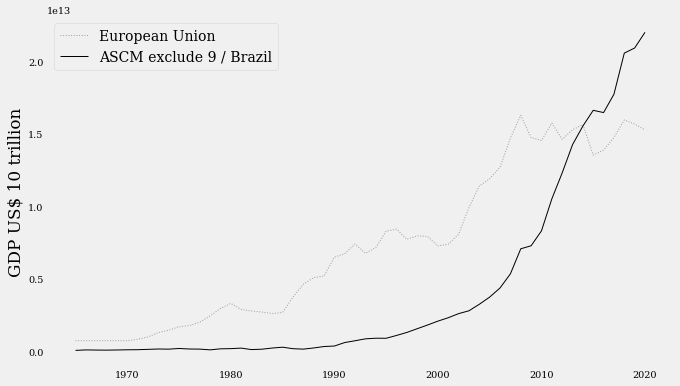

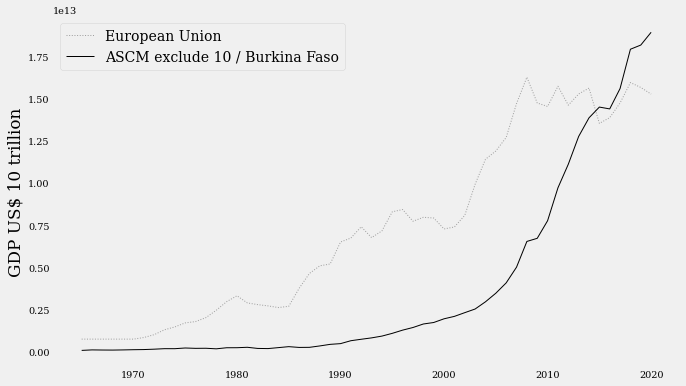

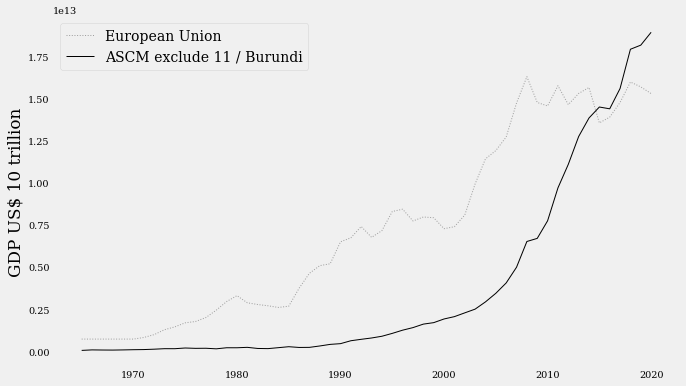

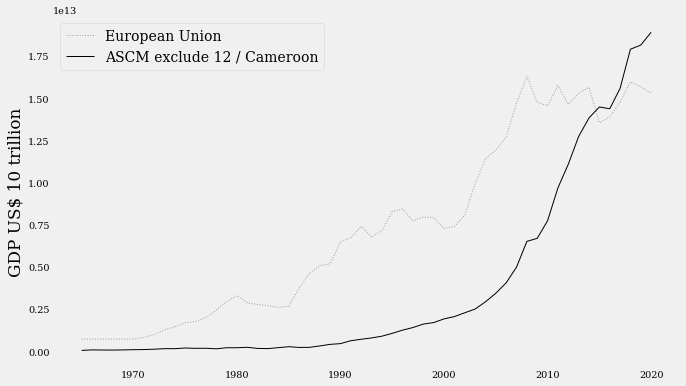

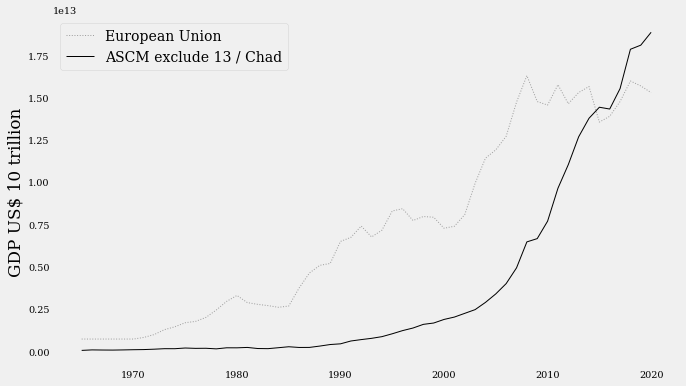

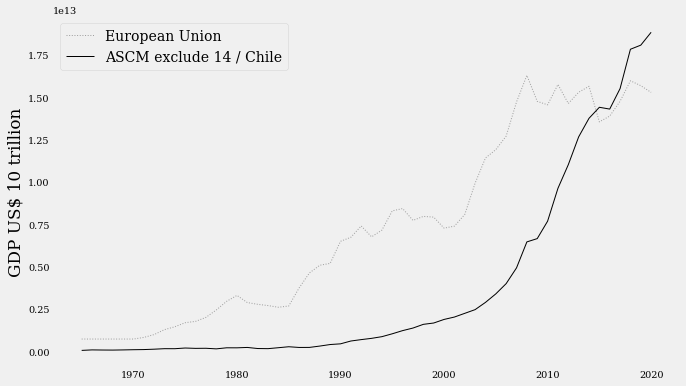

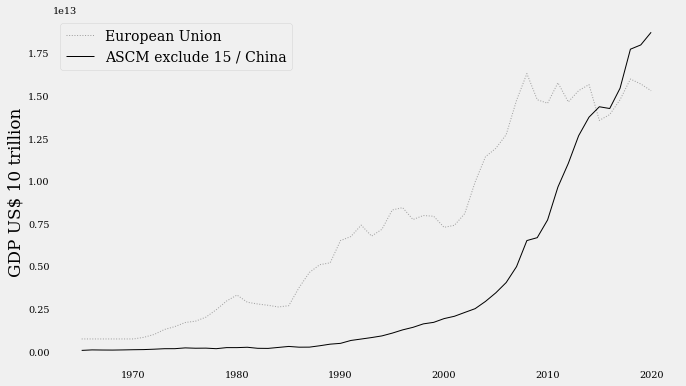

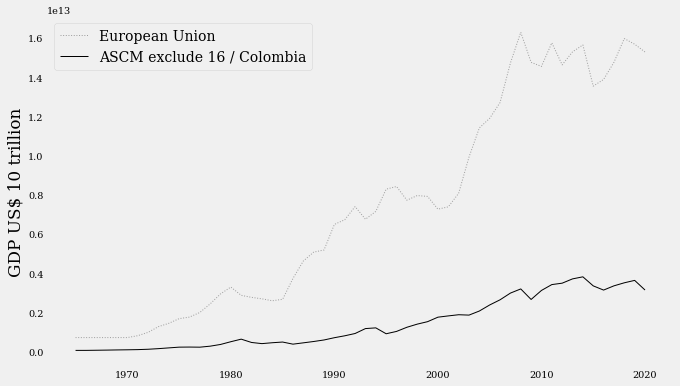

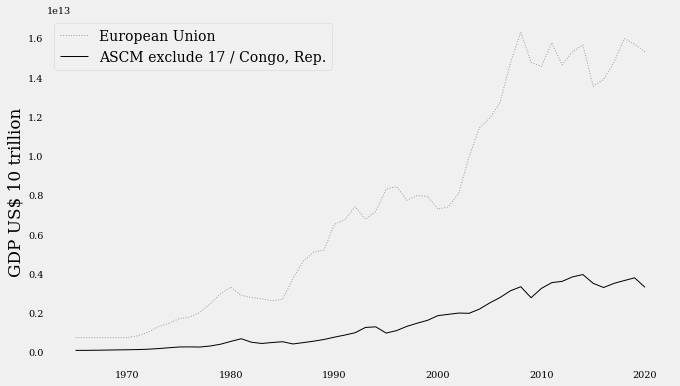

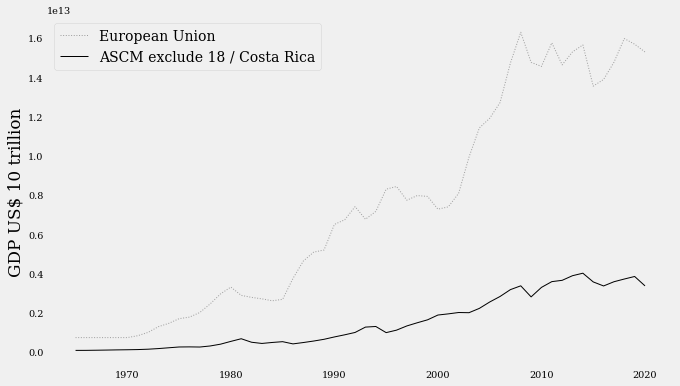

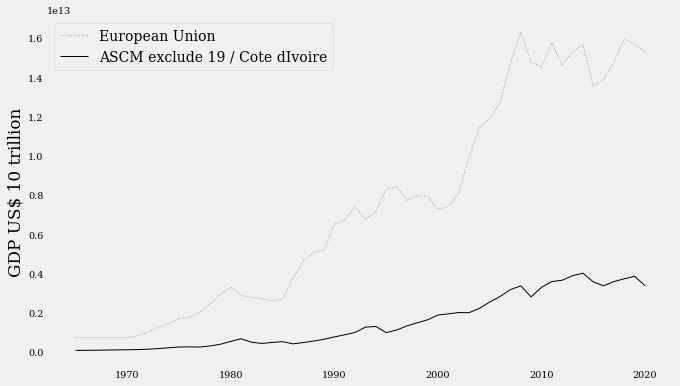

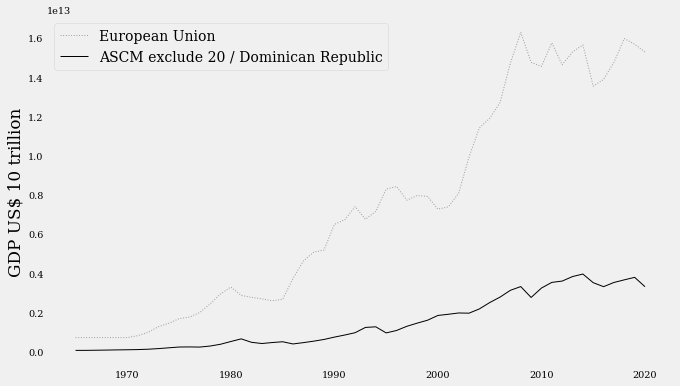

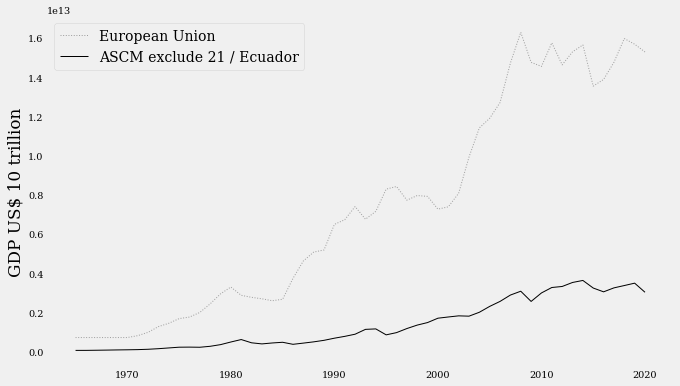

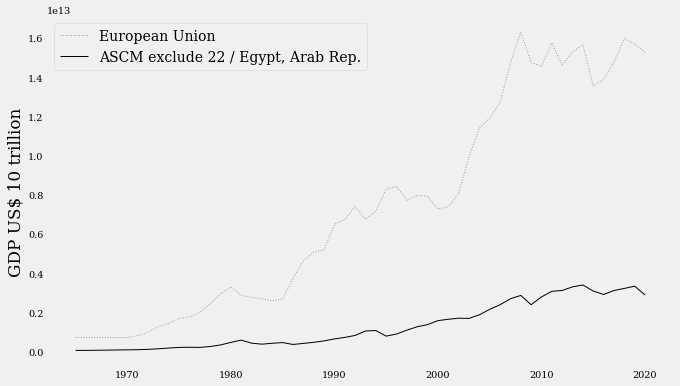

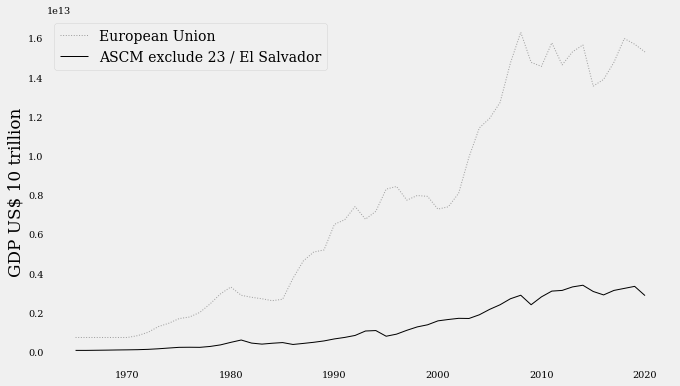

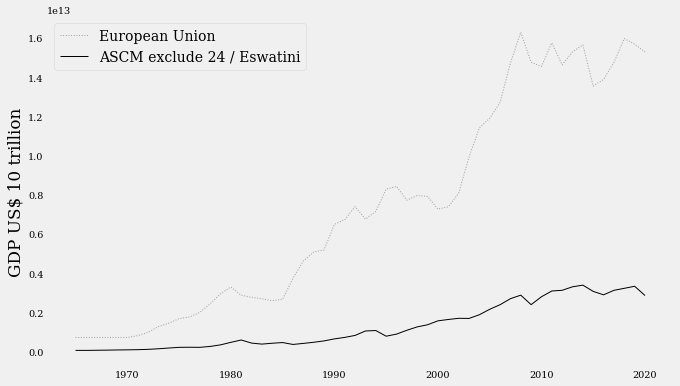

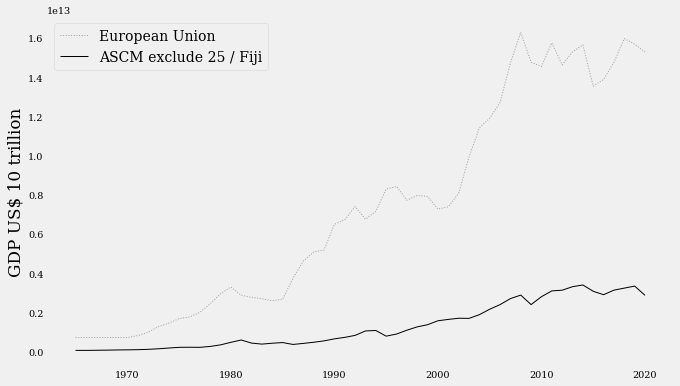

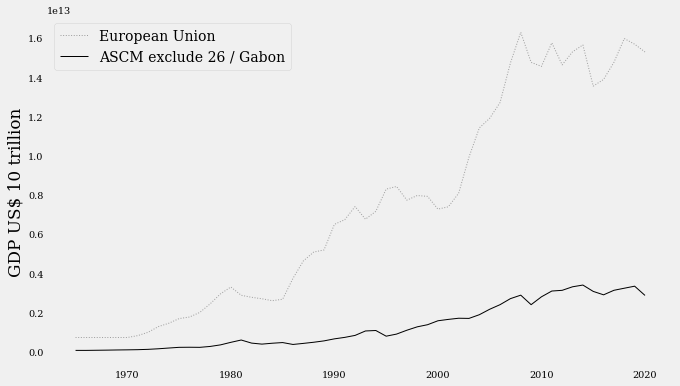

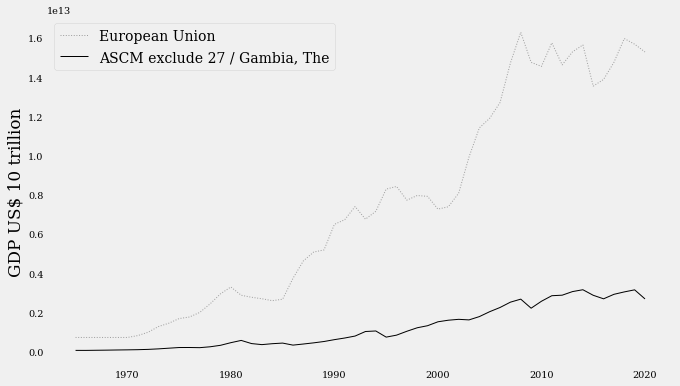

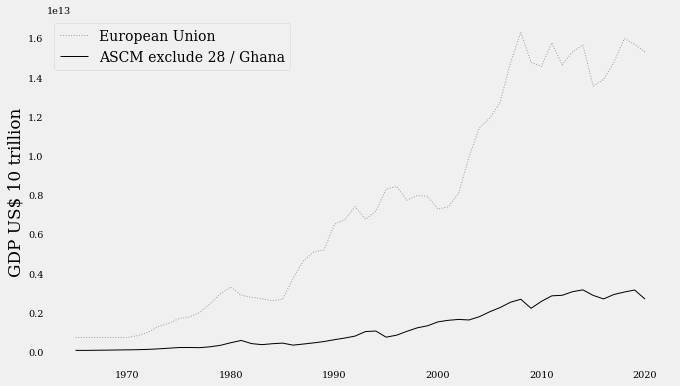

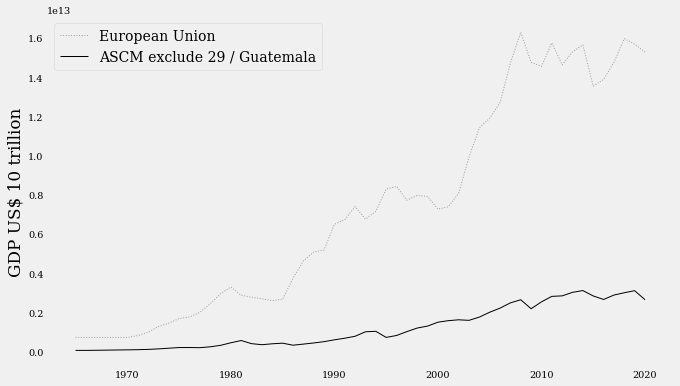

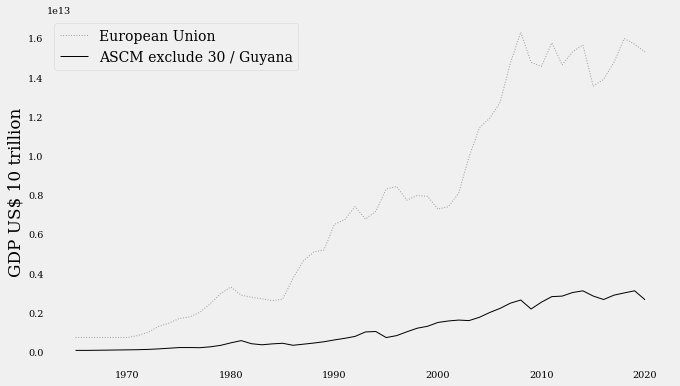

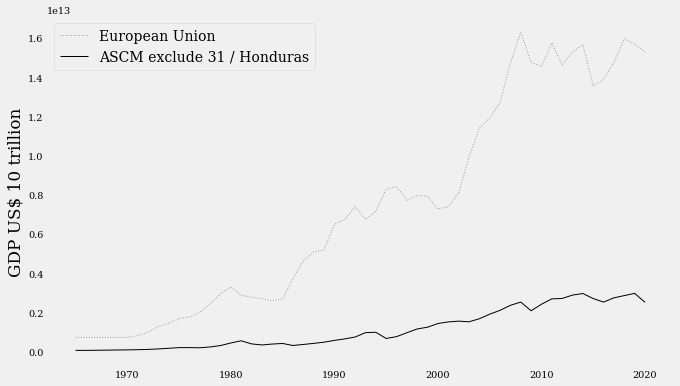

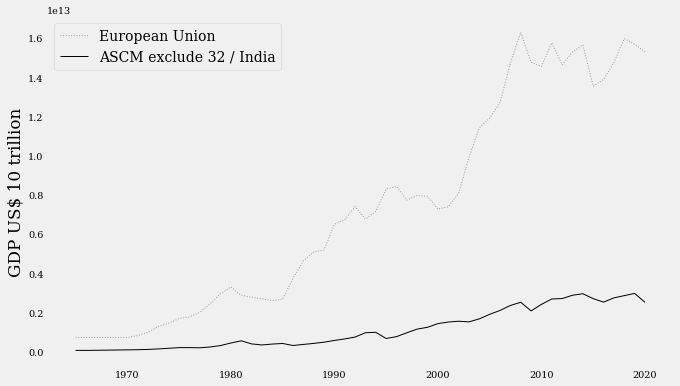

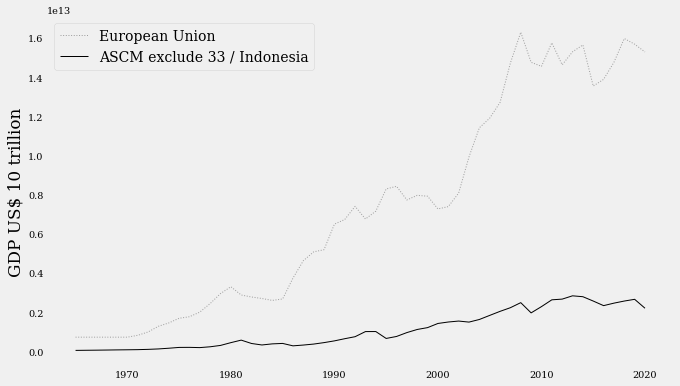

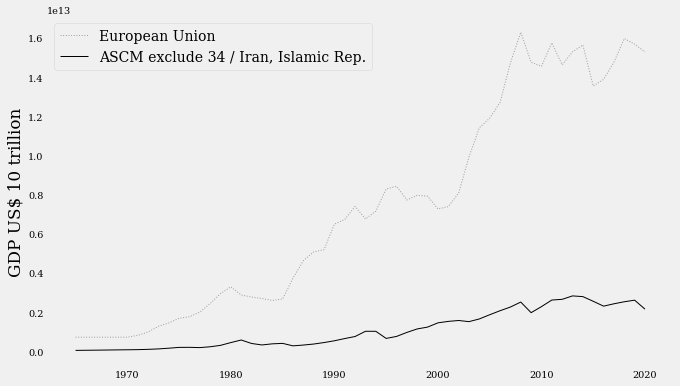

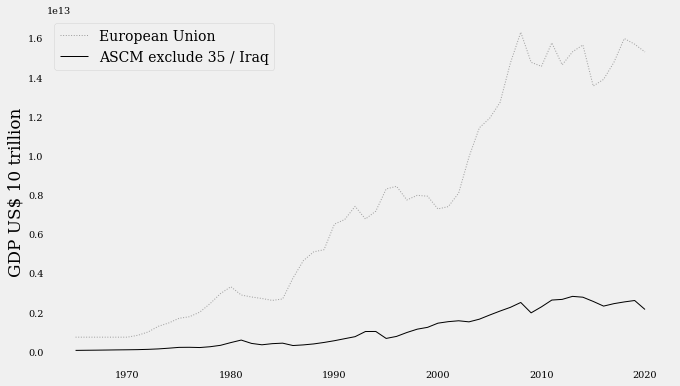

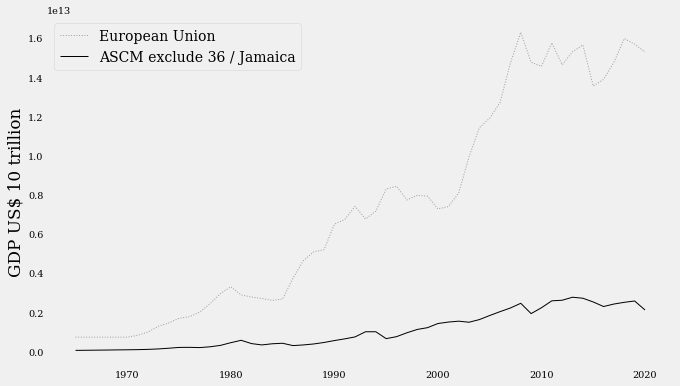

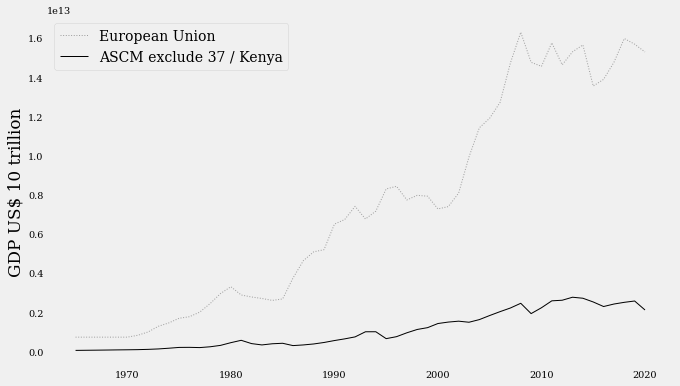

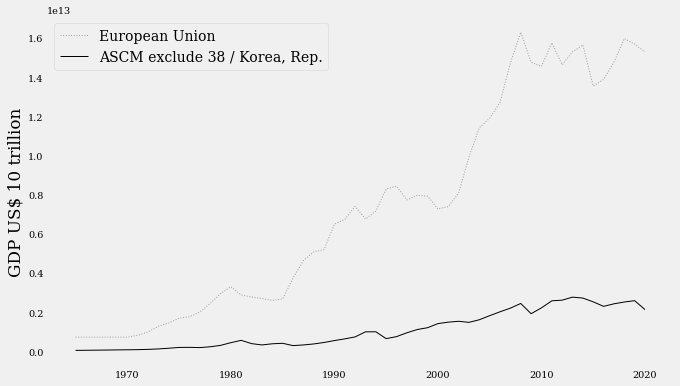

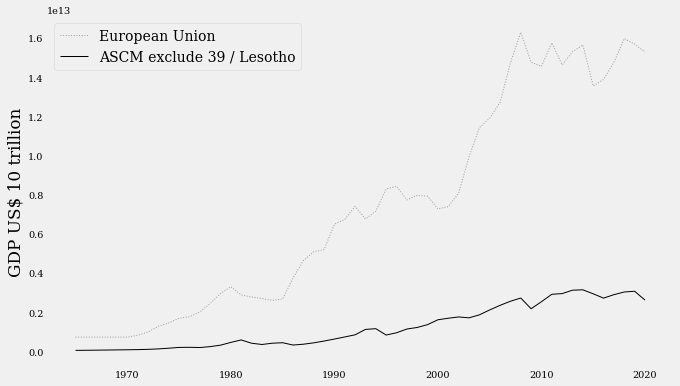

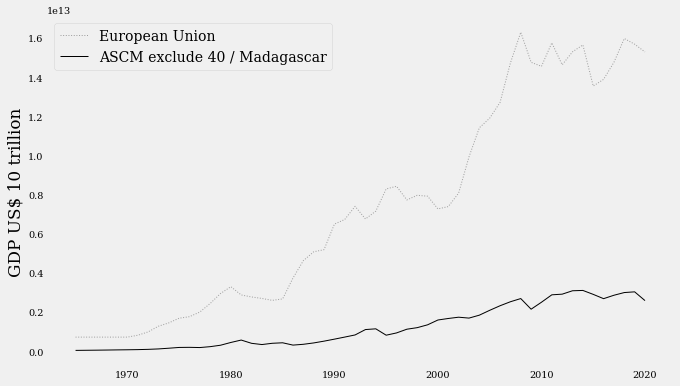

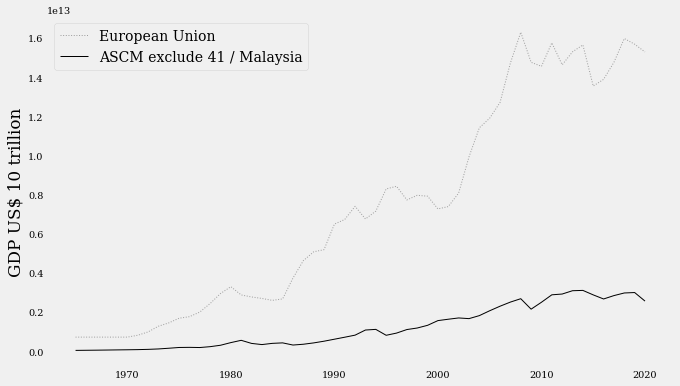

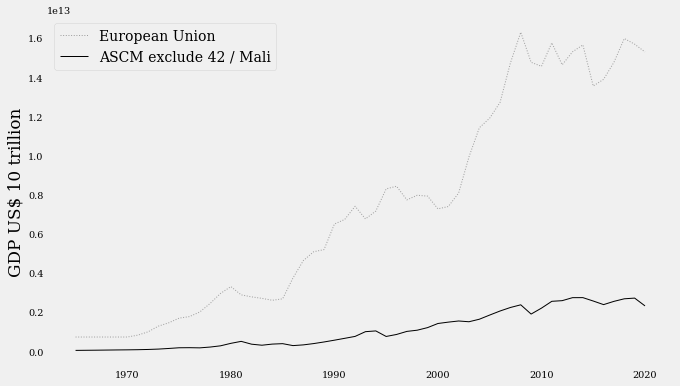

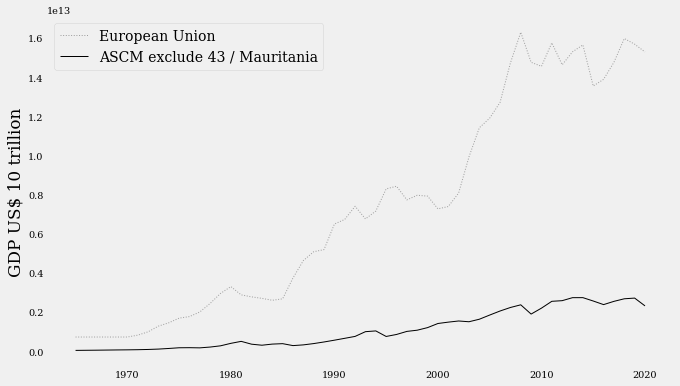

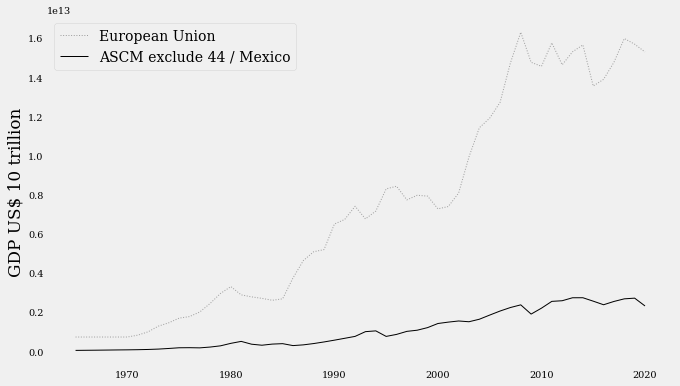

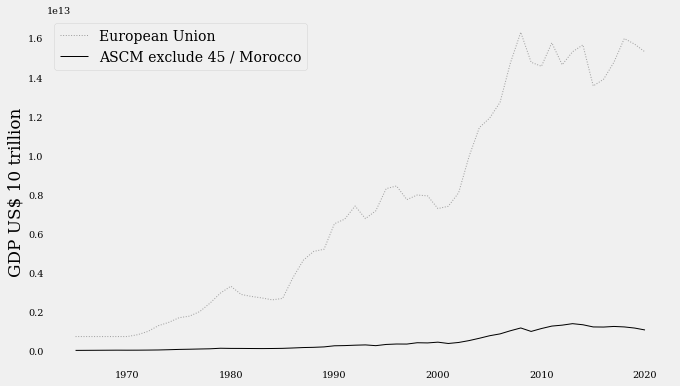

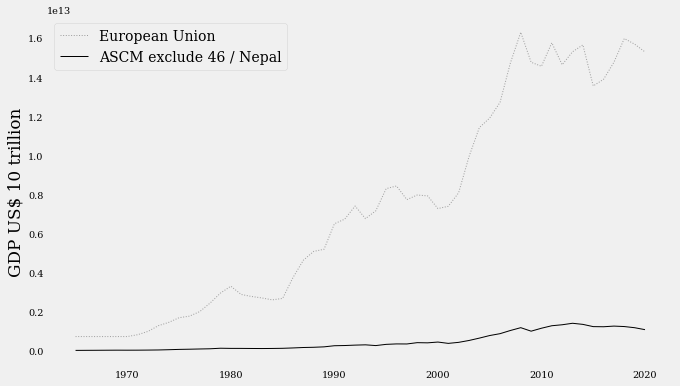

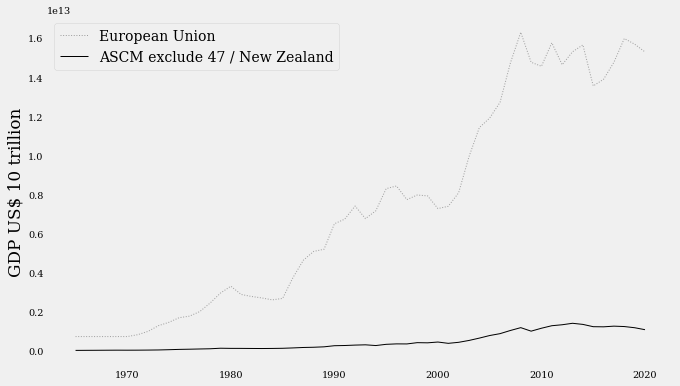

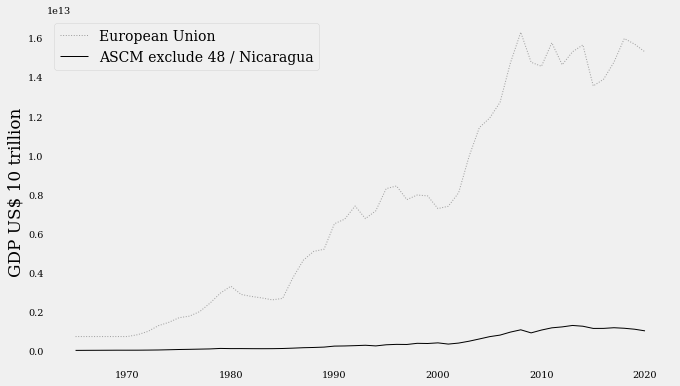

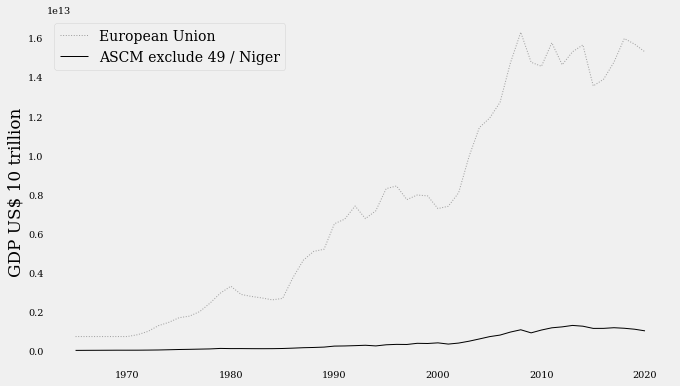

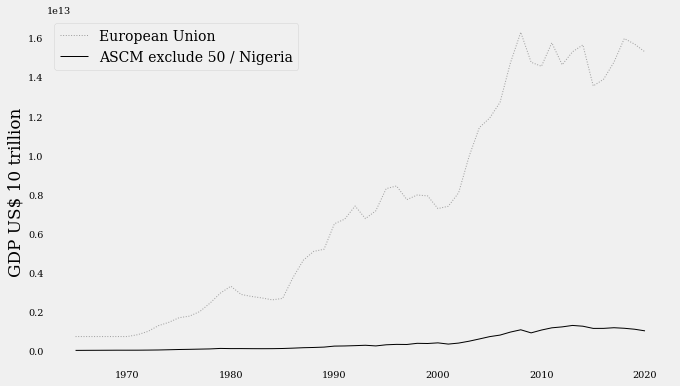

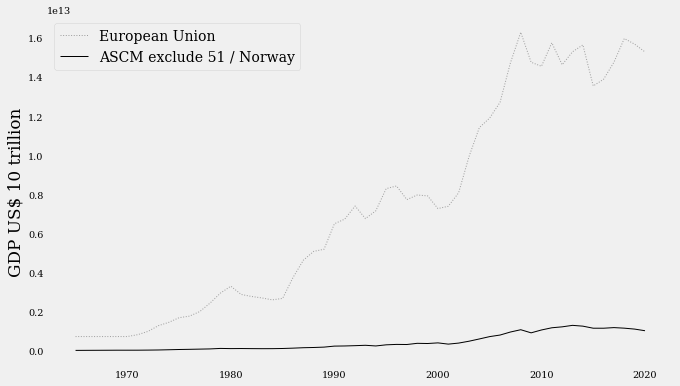

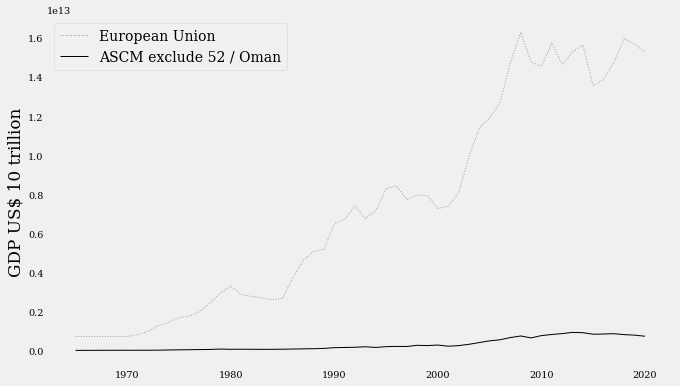

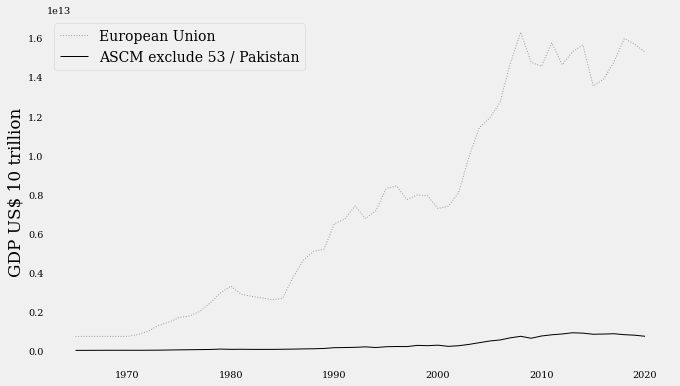

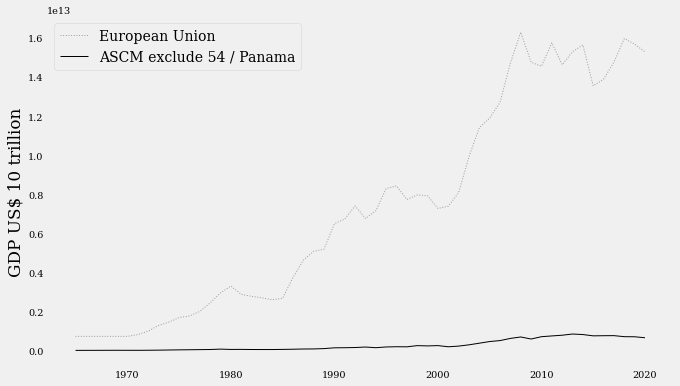

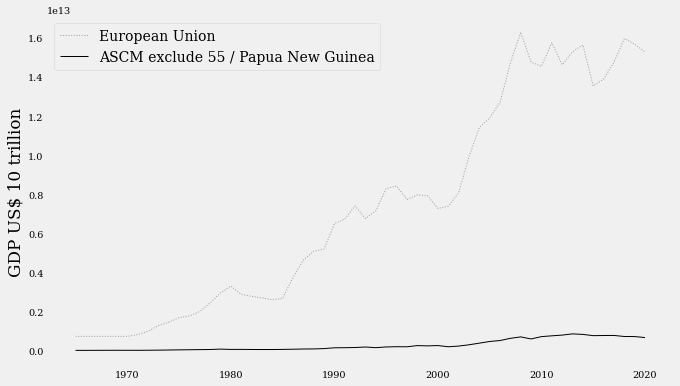

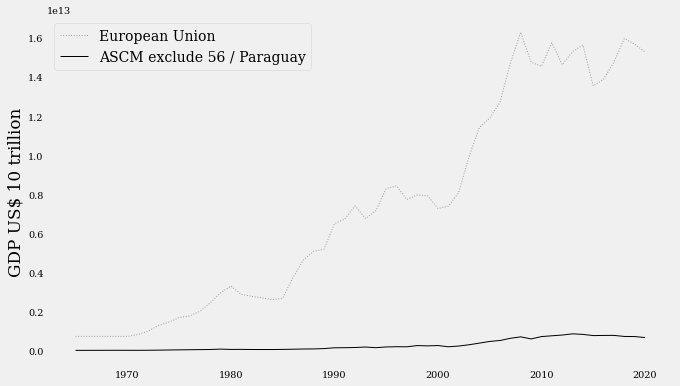

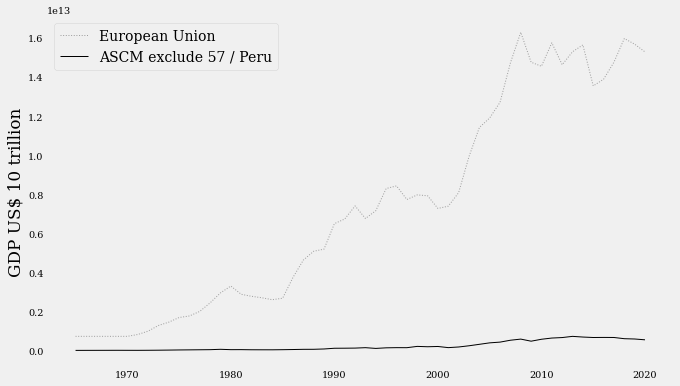

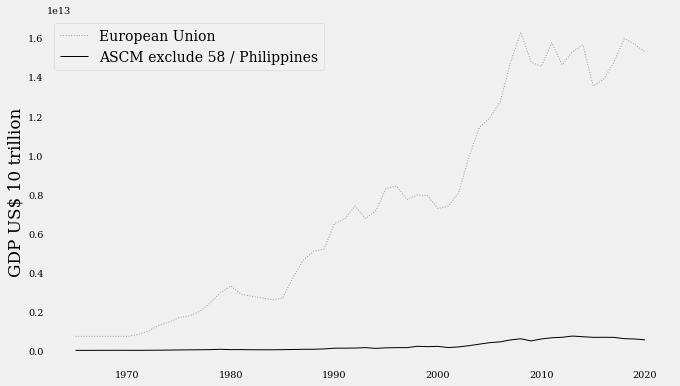

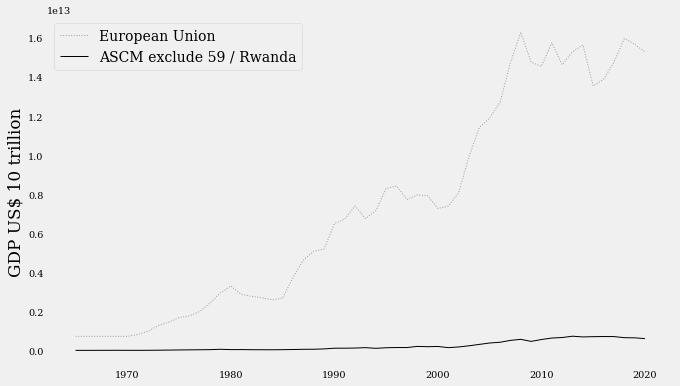

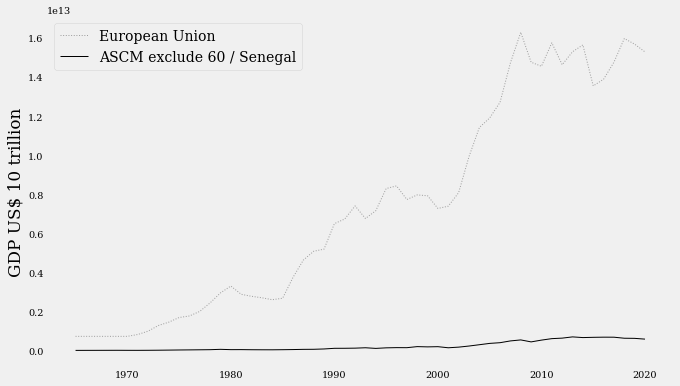

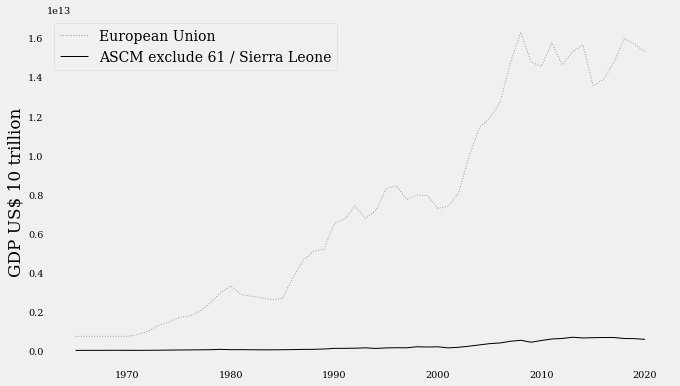

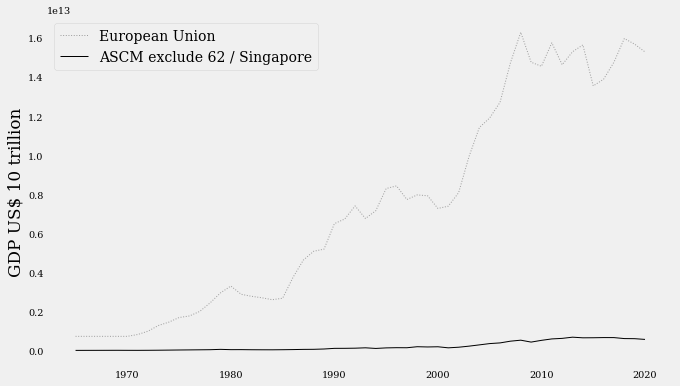

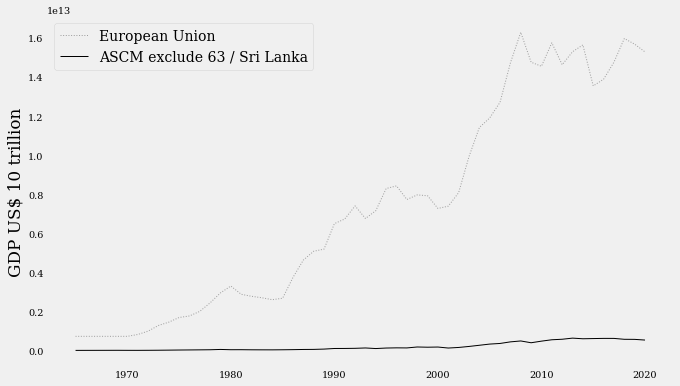

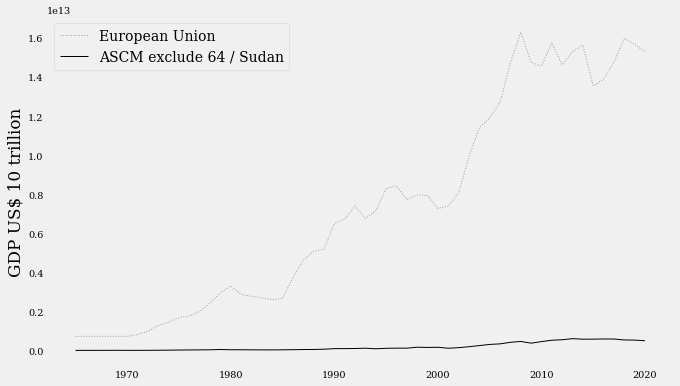

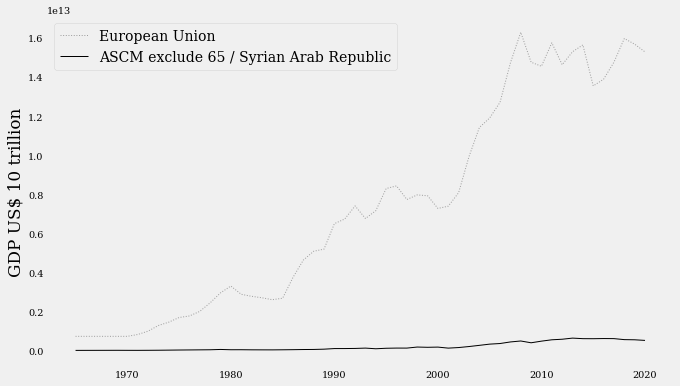

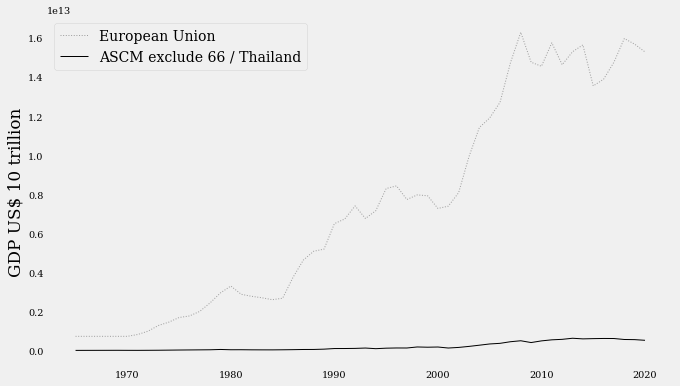

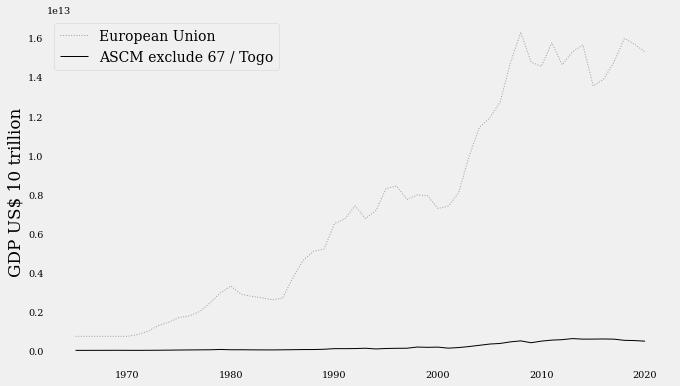

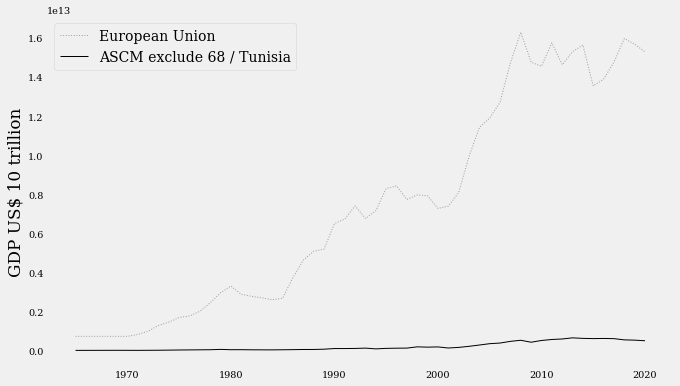

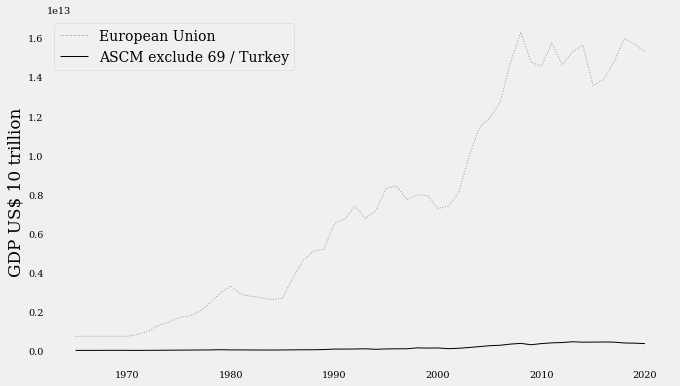

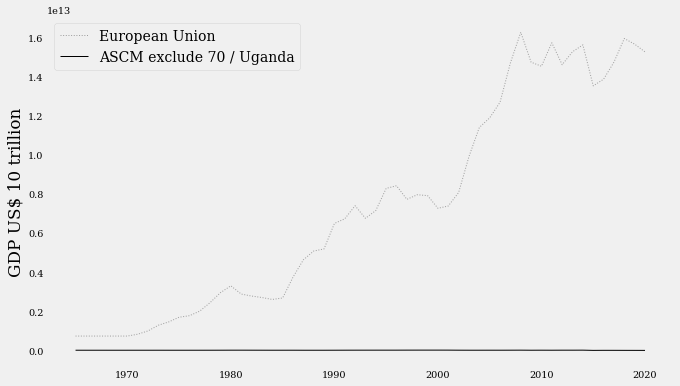

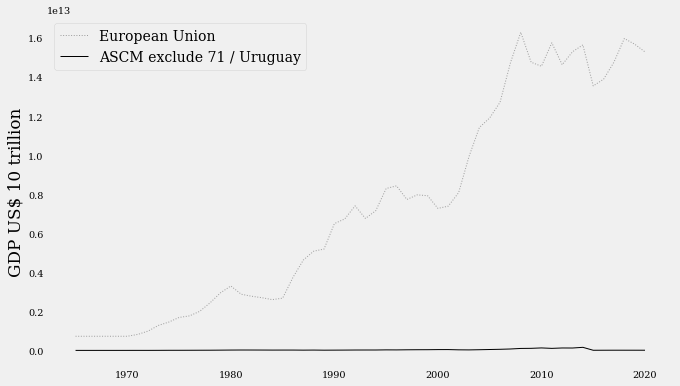

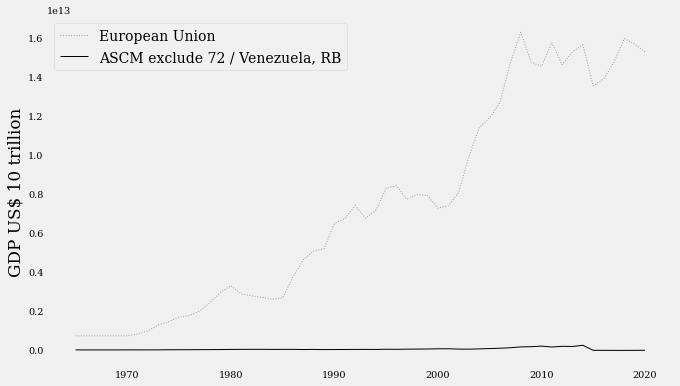

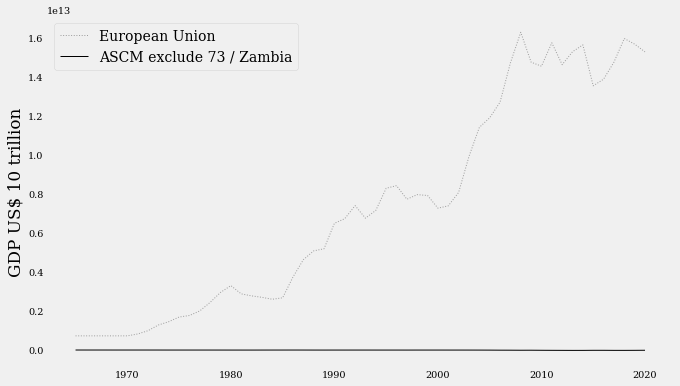

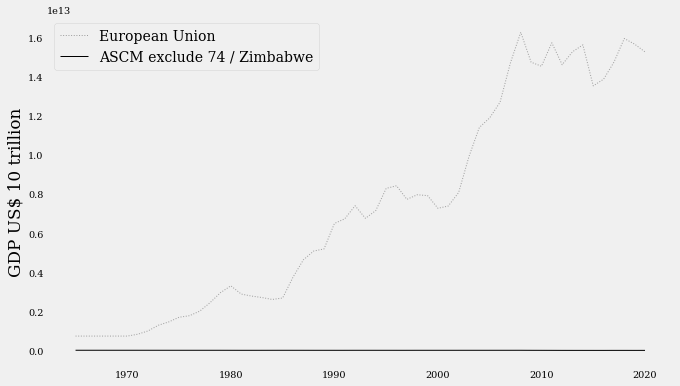

In [464]:

ascm_limit_donor_pool('European Union','GDP (current US$)', data_gdp, incident_year = 2011, std_scaling=True, detail = False, ylabel="GDP US$ 10 trillion")